In [1]:
import f3dasm
import numpy as np

2023-05-24 10:50:16,881 - Imported f3dasm (version: 1.1.0)
2023-05-24 10:50:17.846351: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-24 10:50:18.079977: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-24 10:50:18.880944: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.1/lib64:/

In [2]:
len(f3dasm.functions.FUNCTIONS)

73

TODO:

Check for the functions listed below with offset if the global minimum isnt exceeded by random sampling
This is still present in some functions

Reason: some function outside their given domain give better global minimum. So offsetting will change the global minimum

In [29]:
d_list = []
y_min_list = []
for f in f3dasm.functions.FUNCTIONS:
    # check if the function accepts this dimensionality
    dim_list = [2, 3, 10, 4, 5, 1]
    d = next((dim for _, dim in enumerate(dim_list) if f.is_dim_compatible(dim)), None)
    func = f(dimensionality=d, scale_bounds=np.tile([-1., 1.], (d, 1)), offset=True)
    x_min = func.get_global_minimum(d)[0]
    y_min = float(func.get_global_minimum(d)[1][0])

    # create 100 random points in the input_domain of the function
    x = np.random.uniform(low=-1.0, high=1.0, size=(1000, d))
    # for every point, evaluate the function, store the lowest value and store the corresponding x value
    y = np.array([func(x_i) for x_i in x])

    # check if the lowest value is lower than the global minimum and store the functionname and x value
    if np.min(y) < y_min:
        
        # print the function name, the np.min(y) and y_min
        print(f"{f.__name__}({d}) = \t {np.min(y)} < {y_min} \t iter:{x[np.argmin(y)]}, glob:{x_min}, offset:{func.o.offset} ")
    # print f-string the name of the function, the dimensionality and get_global_minimum
    # print(f"{f.__name__}({d}) = \t {float(func.get_global_minimum(d)[1][0])}")

    d_list.append(d)

Adjiman(2) = 	 -2.7676591902571053 < -2.02180678 	 iter:[ 0.98819388 -0.61110387], glob:[[-0.8085585  -0.74296138]], offset:[-0.47522517 -0.74296138] 
EggHolder(2) = 	 -1039.6939622842938 < -959.6406627106155 	 iter:[0.96254693 0.53367425], glob:[[0.45282504 0.75249207]], offset:[-0.54717496 -0.03702336] 
HolderTable(2) = 	 -1997.1457261991236 < -19.208502567767606 	 iter:[-0.99517412  0.93846914], glob:[[ 0.56233361  0.40801395]
 [ 0.56233361 -1.52490405]
 [ 2.17333761  0.40801395]
 [ 2.17333761 -1.52490405]], offset:[ 1.36783561 -0.55844505] 
McCormick(2) = 	 -5.05256966907824 < -1.9132228873800594 	 iter:[-0.58104284 -0.69177818], glob:[[0.55058248 0.36108062]], offset:[1.20403703 0.87674728] 
Schwefel(2) = 	 -431.2474828053473 < 2.5455675086050178e-05 	 iter:[0.98149644 0.91116455], glob:[[-0.27149469  0.91667162]], offset:[-1.11343209  0.07473422] 
Wolfe(3) = 	 -1.4283346432352024 < 0.0 	 iter:[-0.63521186  0.87774247 -0.96072661], glob:[[-0.48618987  0.90913457  0.53453171]], off

(<Figure size 700x700 with 1 Axes>,
 <Axes3DSubplot: xlabel='$X_{0}$', ylabel='$X_{1}$', zlabel='$f(X)$'>)

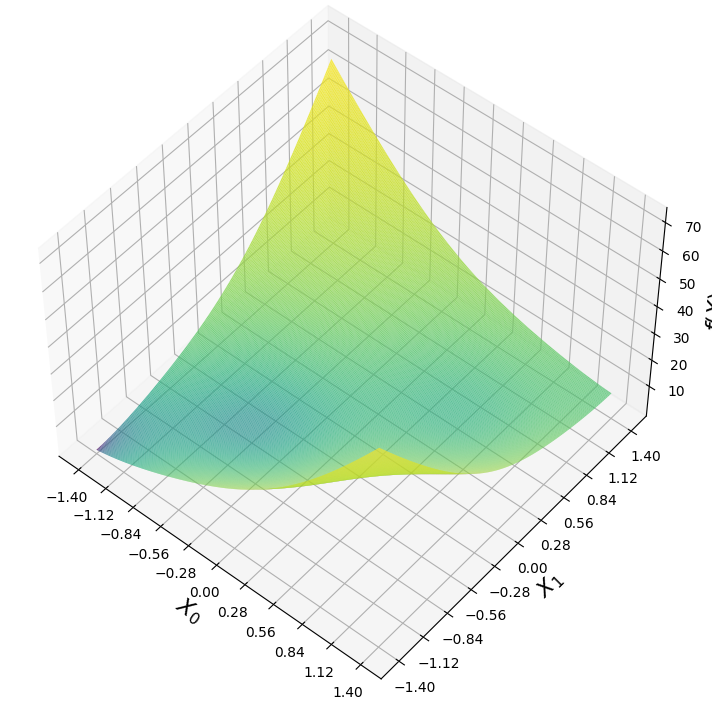

In [26]:
f = f3dasm.functions.McCormick(dimensionality=2, offset=False, scale_bounds=np.tile([-1., 1.], (2, 1)))
f.get_global_minimum(2)
f.plot(domain=np.tile([-1.4,1.4], (2,1)), orientation="3D")

(<Figure size 700x700 with 1 Axes>,
 <Axes3DSubplot: xlabel='$X_{0}$', ylabel='$X_{1}$', zlabel='$f(X)$'>)

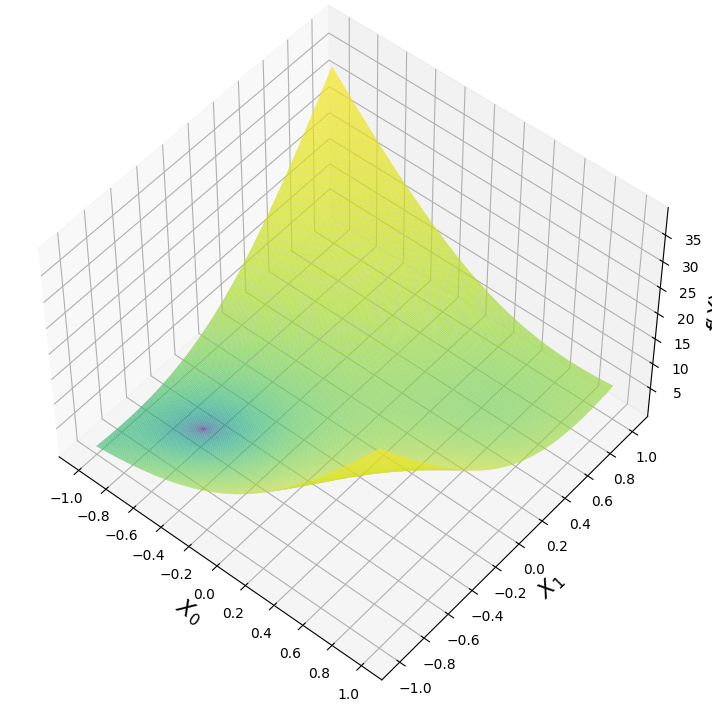

In [27]:
f.plot(domain=np.tile([-1.,1.], (2,1)), orientation="3D")

In [13]:
f.o.offset

array([-1.39622759e+00,  2.14147837e-04])

In [ ]:
offset_list = []
for d in range(10):
    f = f3dasm.functions.Ridge(dimensionality=2, scale_bounds=np.tile([-1., 1.], (2, 1)), offset=True)
    x = np.random.uniform(low=-1.0, high=1.0, size=(1000, 2))
    # for every point, evaluate the function, store the lowest value and store the corresponding x value
    y = np.array([f(x_i) for x_i in x])
    print(np.min(y))

    
# offset_array = np.array(offset_list)
# offset_array.shape
# np.min(offset_array[:,1]), np.max(offset_array[:,1])

# f._get_global_minimum_for_offset_calculation()

In [ ]:
f = f3dasm.functions.Ridge(dimensionality=2, offset=False)
f.plot(domain=np.tile([-5., 5.], (2, 1)))

In [ ]:
f(np.array([[3.0, 0.5]]))

In [ ]:
f(np.array([[-1.0, 2.0]]))

In [ ]:
a = []

f = f3dasm.functions.Langermann(dimensionality=2)
a = -4.127206060000001
for i in range(100000):
    x = np.random.uniform(low=0.0, high=10.0, size=(1, 2))
    y = f(x)
    # if y is smaller than the previous lowest y, store the value
    if y < a:
        a= y
print(a)

In [ ]:
# # fit a polynomial to the data a
# fit = np.polyfit(np.arange(1,100), a, 2)
# fit[-1] = fit[-1]-3.0


# # plot the polynomial fit and the data
# plt.plot(np.arange(1,100), a)
# plt.plot(np.arange(1,100), np.polyval(fit, np.arange(1,100)))

# # print fit
# print(fit)

# # 4.49903414e-04*(dim**2) - 2.15704771e-01*dim + 2.85292809e+00

In [ ]:
y_min

In [ ]:
y_min_list
# count the number of true values in y_min_list
sum(y_min_list)

In [ ]:
len(d_list)
# Check if the d_list has None values in it
None in d_list

# Find the occurences of unique values in d_list
from collections import Counter
Counter(d_list)


In [ ]:
y_min_list
# convert the list of arrays to a list of floats


In [ ]:
y_min_list